In [1]:
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import wandb
# import seaborn as sns

In [2]:
label_dir = "../data/sdata2/Label"

In [3]:
dirs = os.listdir(label_dir)
print(dirs)

['p02.label', 'p11.label', 'p06.label', 'p04.label', 'p13.label', 'p08.label', 'p00.label', 'p03.label', 'p12.label', 'p07.label', 'p05.label', 'p14.label', 'p09.label', 'p10.label', 'p01.label']


In [4]:
label_files = glob.glob(label_dir+'/p*')
label_files.sort()
print(label_files)

['../data/sdata2/Label/p00.label', '../data/sdata2/Label/p01.label', '../data/sdata2/Label/p02.label', '../data/sdata2/Label/p03.label', '../data/sdata2/Label/p04.label', '../data/sdata2/Label/p05.label', '../data/sdata2/Label/p06.label', '../data/sdata2/Label/p07.label', '../data/sdata2/Label/p08.label', '../data/sdata2/Label/p09.label', '../data/sdata2/Label/p10.label', '../data/sdata2/Label/p11.label', '../data/sdata2/Label/p12.label', '../data/sdata2/Label/p13.label', '../data/sdata2/Label/p14.label']


In [5]:
pitches = []
yaws = []
for lfile in label_files:
    with open(lfile) as f:
        lines = list(f)
        for line in lines[1:]:
            line = line.strip().split(" ")
            gaze2d = line[7]
            label = np.array(gaze2d.split(",")).astype("float")
#             label = torch.from_numpy(label).type(torch.FloatTensor)
            pitch = label[0]* 180 / np.pi
            yaw = label[1]* 180 / np.pi
            pitches.append(pitch)
            yaws.append(yaw)
#             print(pitch, yaw)

In [6]:
pitches = np.array(pitches)
yaws = np.array(yaws)

In [7]:
wandb.init(project="angle_distribution_sdata2")

wandb: Currently logged in as: synthesis-ai (use `wandb login --relogin` to force relogin)


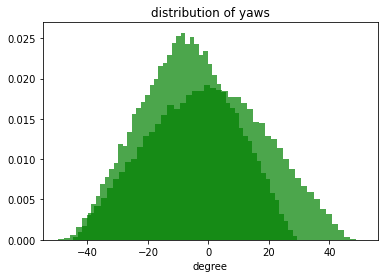

In [8]:
with wandb.init(project="angle_distribution_sdata2") as run:
    num_bins=50
    n, bins, patches = plt.hist(pitches, num_bins, 
                                density = 1, 
                                color ='green',
                                alpha = 0.7)
    plt.title('distribution of pitches')
    plt.xlabel('degree')
    run.log({"data":wandb.Image(plt)})

    # num_bins=50
    n, bins, patches = plt.hist(yaws, num_bins, 
                                density = 1, 
                                color ='green',
                                alpha = 0.7)
    plt.title('distribution of yaws')
    plt.xlabel('degree')
    
    run.log({"data":wandb.Image(plt)})

Text(0.5, 0, 'degree')

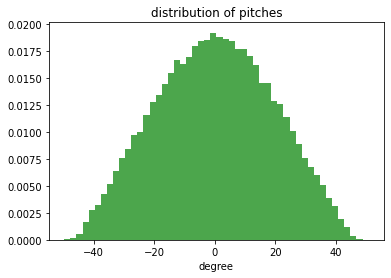

In [9]:
num_bins=50
n, bins, patches = plt.hist(pitches, num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
plt.title('distribution of pitches')
plt.xlabel('degree')

Text(0.5, 0, 'degree')

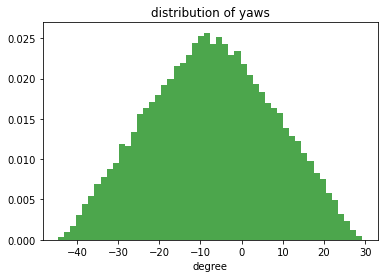

In [10]:
num_bins=50
n, bins, patches = plt.hist(yaws, num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
plt.title('distribution of yaws')
plt.xlabel('degree')